In [1]:
# Importing the libraries
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Read csv
df_hour = pd.read_csv("C:\\Users\\PUNEET SINGH\\hour.csv")
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
df_hour.shape

(17379, 17)

In [4]:
df_hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [5]:
df_hour.info()
print('__'*40)
print(type(df_hour))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
________________________________________________________________________________
<class 'pandas.core.frame.DataFrame'>


In [6]:
#univariate analysis
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df_hour['cnt'])

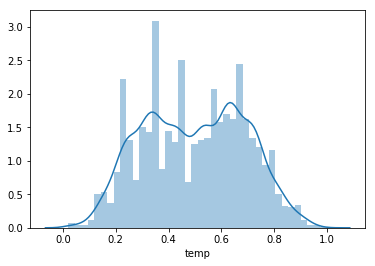

In [7]:
#Distribution  independent numeric variables 
#Check whether  variable 'temp'is normal or not
sns.distplot(df_hour['temp']);



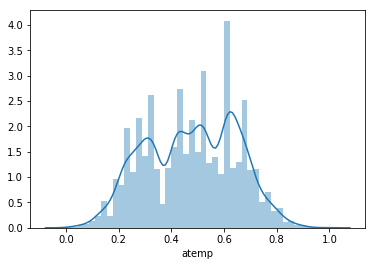

In [8]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(df_hour['atemp']);


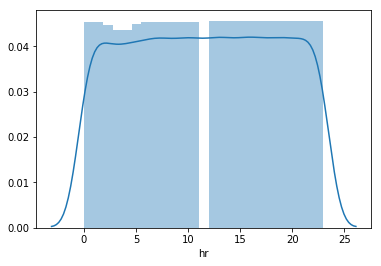

In [9]:
#Check whether  variable 'atemp'is normal or not
sns.distplot(df_hour['hr']);


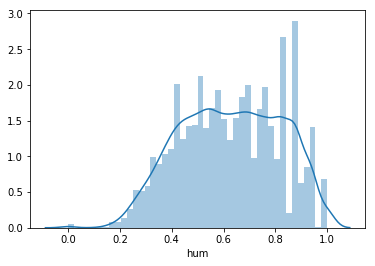

In [10]:
sns.distplot(df_hour['hum']);

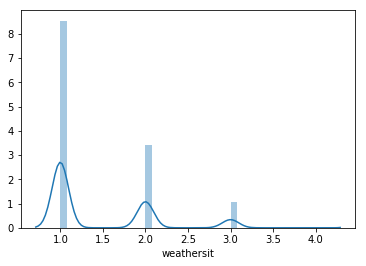

In [11]:
sns.distplot(df_hour['weathersit']);

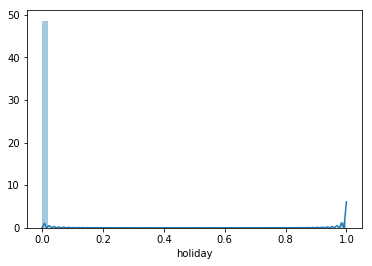

In [12]:
sns.distplot(df_hour['holiday']);

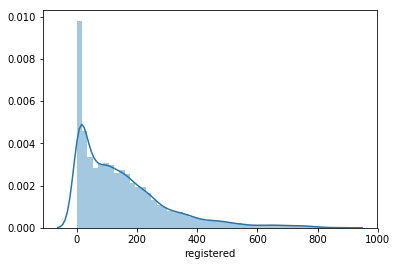

In [13]:
sns.distplot(df_hour['registered']);

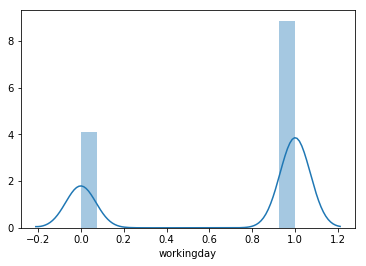

In [14]:
sns.distplot(df_hour['workingday']);

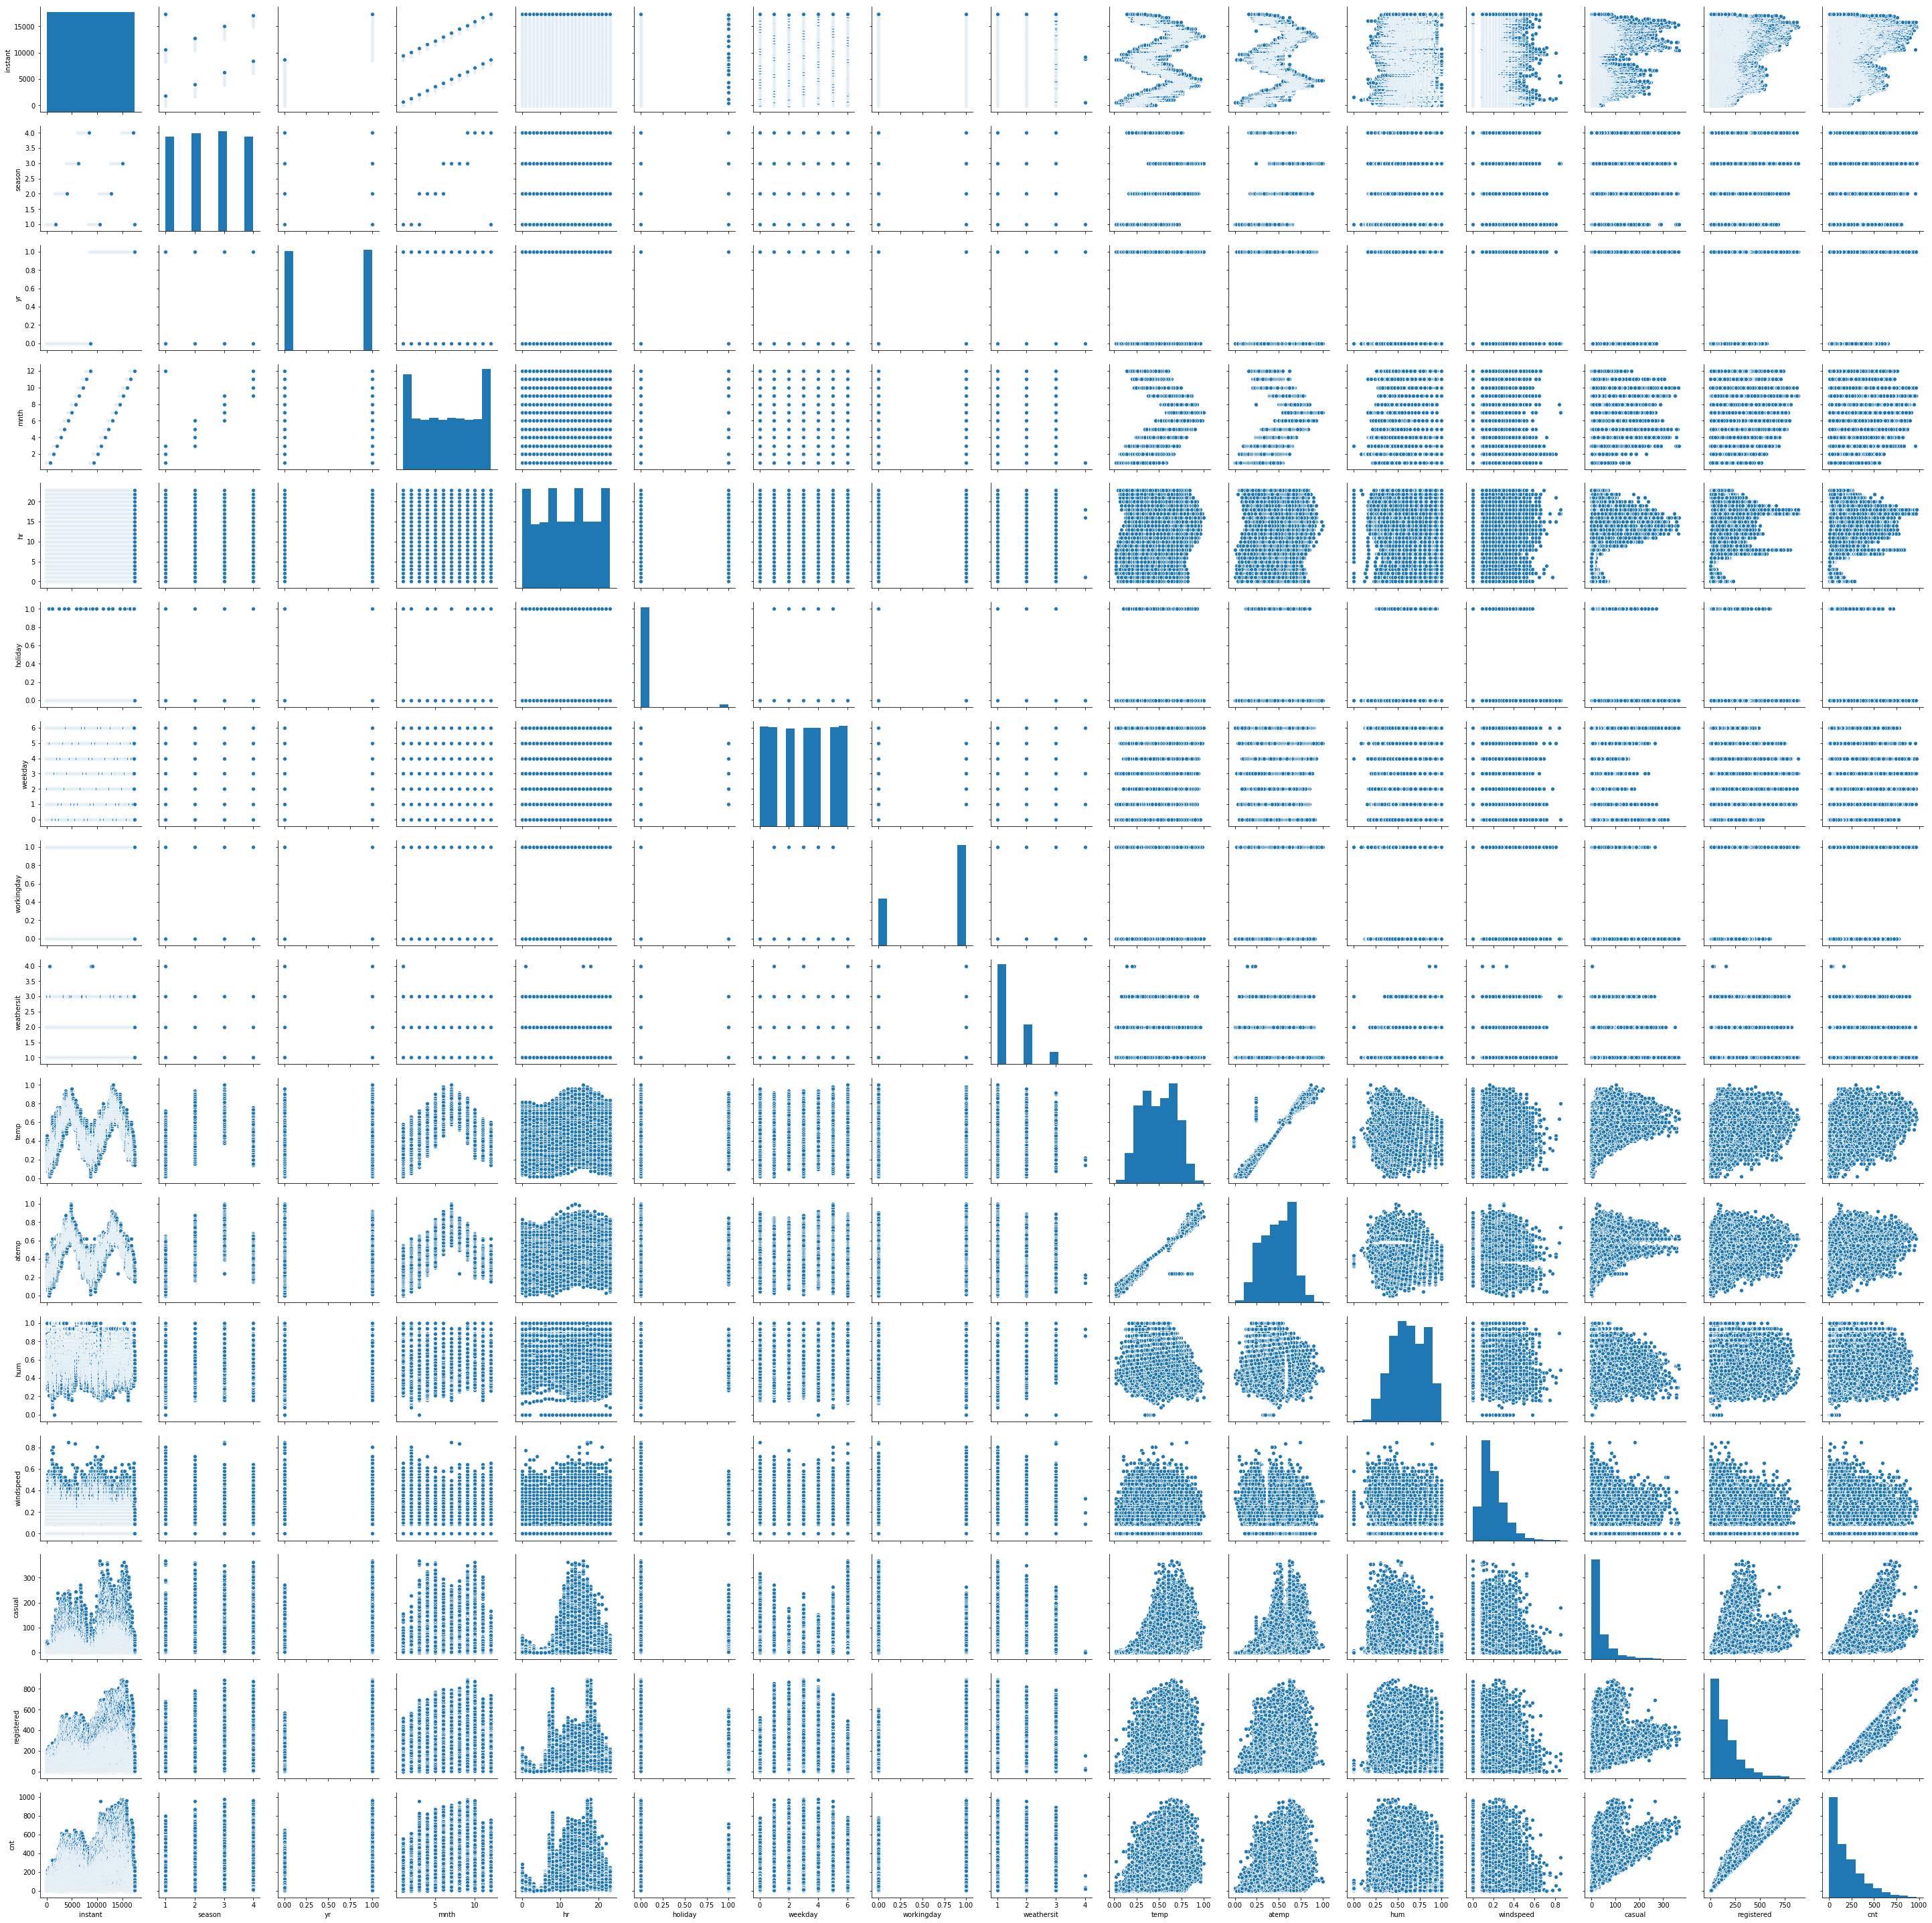

In [15]:
sns.pairplot(df_hour)
plt.show()

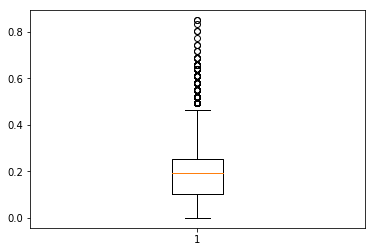

In [16]:
#Checking outliers
plt.boxplot(df_hour['windspeed'])
plt.show()

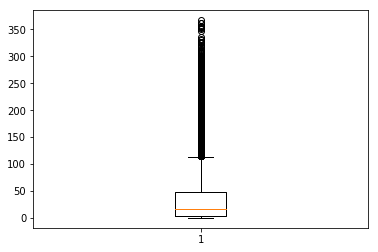

In [17]:
#Checking outliers
plt.boxplot(df_hour['casual'])
plt.show()

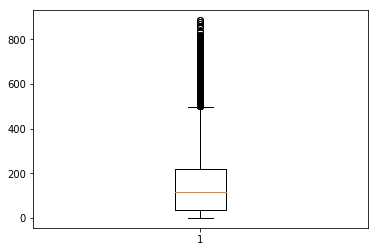

In [18]:
#Checking outliers
plt.boxplot(df_hour['registered'])
plt.show()

In [19]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


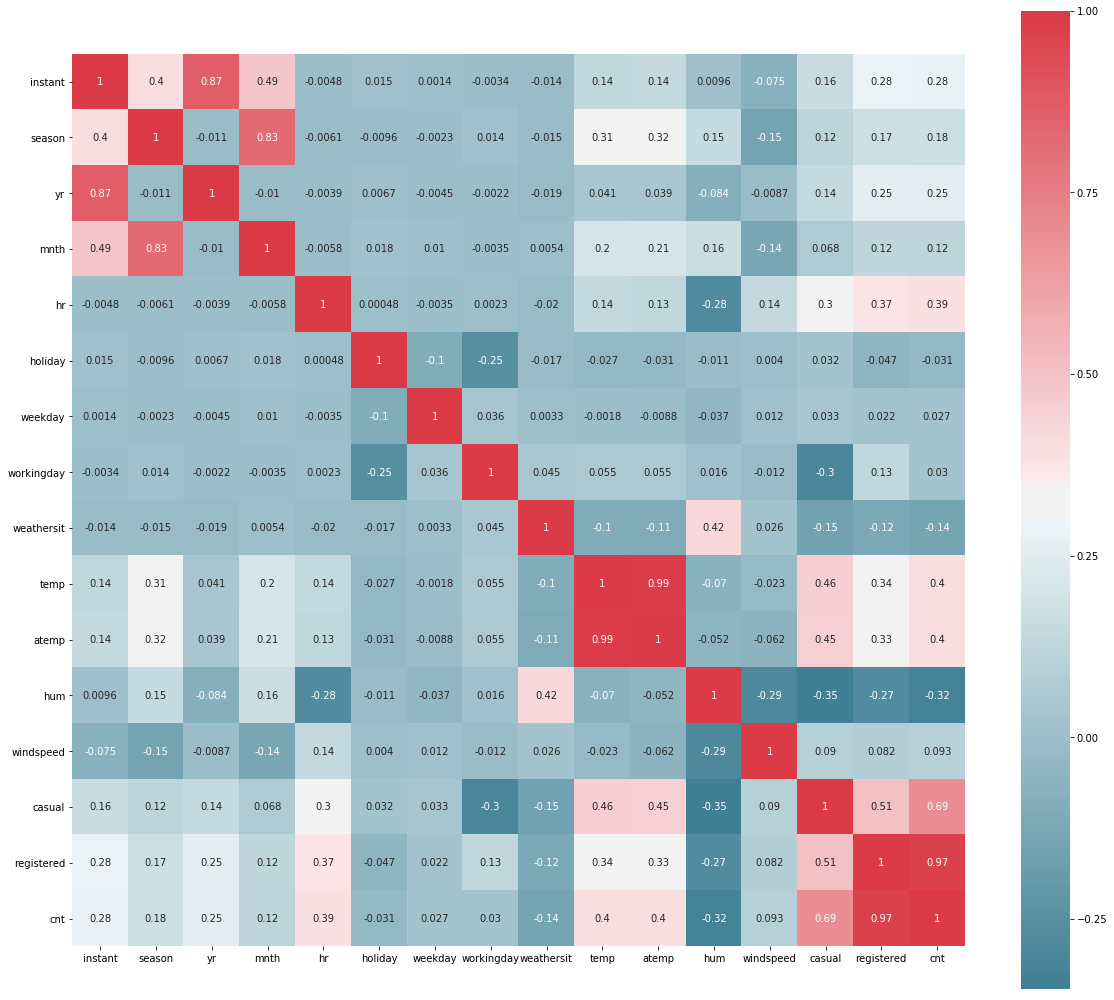

In [20]:
# finding the correlation between the continous variables
f,ax = plt.subplots(figsize=(20,18))
corr=df_hour.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax,annot = True)
plt.show()

In [21]:
#diividing  Test and train data  using skilearn   train_test_split 


from sklearn.model_selection import train_test_split

train, test = train_test_split(df_hour, test_size=0.2)

#train.shape

train.head()
#test.shape
#train.iloc[:,2:13]
#test.head()
#train.iloc[:,13]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
8804,8805,2012-01-07,1,1,1,16,0,6,0,2,0.56,0.5303,0.37,0.2836,133,268,401
12401,12402,2012-06-05,2,1,6,22,0,2,1,1,0.56,0.5303,0.52,0.1045,22,171,193
6921,6922,2011-10-21,4,0,10,0,0,5,1,1,0.40,0.4091,0.62,0.2537,8,42,50
5057,5058,2011-08-03,3,0,8,15,0,3,1,2,0.70,0.6667,0.79,0.1343,31,87,118
16949,16950,2012-12-14,4,1,12,0,0,5,1,1,0.22,0.2576,0.64,0.0896,4,43,47


In [22]:
#********************************** Decision Tree  Regressor ************************************
#Importing Decision Tree Regressor from sklear.tree
from sklearn.tree import DecisionTreeRegressor

train_features_one = train[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
train_target_feature = train['cnt'].values
test_feature = test[['season','yr','mnth','holiday','weekday','weathersit','temp','windspeed','casual','registered']].values
test_target_feature= test['cnt'].values
train_features_one
#target_feature

# Implement  decision tree algorithm

# Fit your first decision tree: my_tree_one
my_tree_one = DecisionTreeRegressor()
my_tree_one = my_tree_one.fit(train_features_one, train_target_feature)
print(my_tree_one)



#Decision tree for regression
#fit_DT = DecisionTreeRegressor(max_depth=2).fit(train.iloc[:,2:13], train.iloc[:,13])

#Apply model on test data
predictions_DT = my_tree_one.predict(test_feature)

print(predictions_DT)

# predition   by using predict method

#predictions_DT = my_tree_one.predict(test_feature)




DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
[ 77. 272.  50. ... 184. 436.  39.]


In [23]:


#Calculate MAPE
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test_target_feature, predictions_DT)


0.8846366083699594

In [24]:
###### Linear Regression #############
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

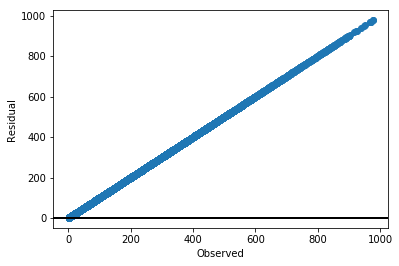

In [27]:
predicted = cross_val_predict(lin_reg, train_features_one, train_target_feature,  cv=10)

fig, ax = plt.subplots()
ax.scatter(train_target_feature, predicted)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

In [28]:
r2_scores = cross_val_score(lin_reg, train_features_one, train_target_feature, cv=10)
mse_scores = cross_val_score(lin_reg, train_features_one, train_target_feature,cv=10,scoring='neg_mean_squared_error')

In [29]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
MSE::[-4.70386125e-26 -1.58584343e-26 -4.29196630e-27 -2.82681555e-26
 -4.94471852e-26 -9.25918095e-26 -8.18014043e-27 -1.57905074e-26
 -9.92264916e-27 -1.89718280e-26]


In [33]:
# FROM BOTH THE MODELS DECISION TREE IS PREDICTING THE MOST ACCURATE ONE WITH 89% ACCURACY
# SAVING THE DECISION TREE MODEL THROUGH PICKLE

In [34]:
import pickle

In [35]:
filehandler = open("finalmodel_25.obj","wb")
# saving the model in pickel string
saved_rf_model = pickle.dump(my_tree_one,filehandler)
filehandler.close()